In [1]:
from scipy import stats
!pip install statannot
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


# sampling_way test

In [5]:
data = pd.read_csv('../model_all_cases.csv')
data

,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan_0_id_00,abs_max(our_custom),64,0.820,0.390,0.970,0.557,0.744
1,fan_0_id_00,abs_max(our_custom),80,0.820,0.390,0.970,0.557,0.731
2,fan_0_id_00,abs_max(our_custom),100,0.824,0.390,1.000,0.561,0.766
3,fan_0_id_00,abs_max(our_custom),125,0.810,0.366,0.938,0.526,0.786
4,fan_0_id_00,abs_max(our_custom),128,0.817,0.378,0.969,0.544,0.748
...,...,...,...,...,...,...,...,...
4027,fan_6_id_06,soxr_qq,3200,0.967,0.875,1.000,0.933,0.999
4028,fan_6_id_06,soxr_qq,4000,0.971,0.889,1.000,0.941,0.996
4029,fan_6_id_06,soxr_qq,8000,0.964,0.875,0.984,0.926,0.999
4030,fan_6_id_06,soxr_qq,10000,0.975,0.903,1.000,0.949,0.996


In [6]:
def make_Object(x):
    if '__6_' in x:
        object = '_6'
    elif '_6_' in x:
        object = '6'
    else :
        object = '0'
    return object

data['Noise'] = data['Model'].apply(make_Object)
data['Object'] = data['Model'].apply(lambda x : x.split('_')[0])
data['Model'] = data['Model'].apply(lambda x : x[-5:])
data = data[['Object','Noise', 'Model', 'sampling_way', 'target_sr', 'acc', 'recall', 'precision','f1', 'auc_score']]
data.loc[data['sampling_way'] == 'abs_max(our_custom)', 'sampling_way'] = 'MaxPooling'
data

,Object,Noise,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan,0,id_00,MaxPooling,64,0.820,0.390,0.970,0.557,0.744
1,fan,0,id_00,MaxPooling,80,0.820,0.390,0.970,0.557,0.731
2,fan,0,id_00,MaxPooling,100,0.824,0.390,1.000,0.561,0.766
3,fan,0,id_00,MaxPooling,125,0.810,0.366,0.938,0.526,0.786
4,fan,0,id_00,MaxPooling,128,0.817,0.378,0.969,0.544,0.748
...,...,...,...,...,...,...,...,...,...,...
4027,fan,6,id_06,soxr_qq,3200,0.967,0.875,1.000,0.933,0.999
4028,fan,6,id_06,soxr_qq,4000,0.971,0.889,1.000,0.941,0.996
4029,fan,6,id_06,soxr_qq,8000,0.964,0.875,0.984,0.926,0.999
4030,fan,6,id_06,soxr_qq,10000,0.975,0.903,1.000,0.949,0.996


In [7]:
data['Noise'].unique()

array(['0', '_6', '6'], dtype=object)

In [8]:
data

,Object,Noise,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan,0,id_00,MaxPooling,64,0.820,0.390,0.970,0.557,0.744
1,fan,0,id_00,MaxPooling,80,0.820,0.390,0.970,0.557,0.731
2,fan,0,id_00,MaxPooling,100,0.824,0.390,1.000,0.561,0.766
3,fan,0,id_00,MaxPooling,125,0.810,0.366,0.938,0.526,0.786
4,fan,0,id_00,MaxPooling,128,0.817,0.378,0.969,0.544,0.748
...,...,...,...,...,...,...,...,...,...,...
4027,fan,6,id_06,soxr_qq,3200,0.967,0.875,1.000,0.933,0.999
4028,fan,6,id_06,soxr_qq,4000,0.971,0.889,1.000,0.941,0.996
4029,fan,6,id_06,soxr_qq,8000,0.964,0.875,0.984,0.926,0.999
4030,fan,6,id_06,soxr_qq,10000,0.975,0.903,1.000,0.949,0.996


In [9]:
data0 = data[data['Noise'] == '0']
data0

,Object,Noise,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan,0,id_00,MaxPooling,64,0.820,0.390,0.970,0.557,0.744
1,fan,0,id_00,MaxPooling,80,0.820,0.390,0.970,0.557,0.731
2,fan,0,id_00,MaxPooling,100,0.824,0.390,1.000,0.561,0.766
3,fan,0,id_00,MaxPooling,125,0.810,0.366,0.938,0.526,0.786
4,fan,0,id_00,MaxPooling,128,0.817,0.378,0.969,0.544,0.748
...,...,...,...,...,...,...,...,...,...,...
1339,fan,0,id_06,soxr_qq,3200,0.924,0.708,1.000,0.829,0.986
1340,fan,0,id_06,soxr_qq,4000,0.935,0.750,1.000,0.857,0.981
1341,fan,0,id_06,soxr_qq,8000,0.924,0.708,1.000,0.829,0.984
1342,fan,0,id_06,soxr_qq,10000,0.935,0.750,1.000,0.857,0.990


In [13]:
result = 0
i = 0

result_lst = []
mean = []
id_lst = ['id_00', 'id_02', 'id_04', 'id_06']
for id_num in id_lst:
    for sampling_way in data0['sampling_way'].unique():
        mean_data = data0[(data0['Model'] == id_num) & (data0['sampling_way'] == sampling_way)]['f1'].mean()
        mean.append(round(mean_data, 3))
    result_lst.append(mean)
    mean = []
    
f1_by_method_df = pd.DataFrame(result_lst).T
f1_by_method_df = pd.concat([pd.DataFrame(data0['sampling_way'].unique()), f1_by_method_df], axis = 1)
f1_by_method_df.columns = ['method', 'id_00', 'id_02', 'id_04', 'id_06']
#f1_by_method_df['mean'] = np.mean(f1_by_method_df, axis = 1).round(3)
f1_by_method_df

,method,id_00,id_02,id_04,id_06
0,MaxPooling,0.514,0.438,0.651,0.929
1,kaiser_best,0.739,0.071,0.241,0.445
2,kaiser_fast,0.746,0.060,0.262,0.412
3,fft,0.718,0.064,0.270,0.435
4,scipy,0.718,0.064,0.270,0.435
5,polyphase,0.726,0.069,0.255,0.434
6,linear,0.548,0.097,0.133,0.819
7,zero_order_hold,0.552,0.096,0.130,0.819
8,sinc_best,0.690,0.076,0.260,0.439
9,sinc_medium,0.687,0.052,0.241,0.446


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
zero_order_hold v.s. MaxPooling: Wilcoxon test (paired samples), P_val=5.500e-10 stat=3.265e+02
Using zero_method  wilcox
linear v.s. MaxPooling: Wilcoxon test (paired samples), P_val=4.306e-10 stat=3.185e+02
Using zero_method  wilcox
soxr_qq v.s. MaxPooling: Wilcoxon test (paired samples), P_val=4.818e-10 stat=3.550e+02
Using zero_method  wilcox
soxr_hq v.s. MaxPooling: Wilcoxon test (paired samples), P_val=9.205e-07 stat=6.620e+02
Using zero_method  wilcox
soxr_vhq v.s. MaxPooling: Wilcoxon test (paired samples), P_val=1.186e-06 stat=6.730e+02
Using zero_method  wilcox
soxr_mq v.s. MaxPooling: Wilcoxon test (paired samples), P_val=8.401e-07 stat=6.360e+02
Using zero_method  wilcox
kaiser_best v.s. MaxPooling: Wilcoxon test (paired samples), P_val=1.234e-06 stat=6.975e+02
Using zero_method  wilcox


(<Axes: xlabel='sampling_way', ylabel='f1'>,
  <statannot.StatResult.StatResult at 0x7f6b499fedf0>])

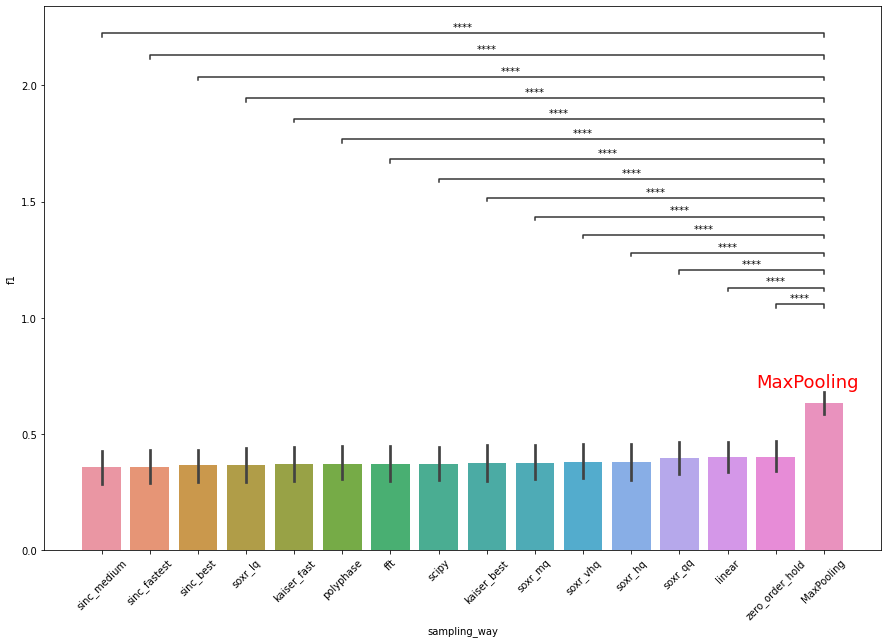

In [16]:
fig = plt.figure(figsize = (15, 10))
ax1 = sns.barplot(x="sampling_way", y="f1", data=data_df,
                                             order = data_df.groupby('sampling_way').mean().sort_values('f1').index)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
result_wilcoxon = add_stat_annotation(ax1, data=data_df, x="sampling_way", y="f1",
                                            order=data_df.groupby('sampling_way').mean().sort_values('f1').index,
                                            box_pairs=[(f1_by_method_df.iloc[15,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[14,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[13,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[12,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[11,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[10,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[9,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[8,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[7,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[6,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[5,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[4,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[3,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[2,0], f1_by_method_df.iloc[0,0]),
                                                       (f1_by_method_df.iloc[1,0], f1_by_method_df.iloc[0,0])],
                                            test= 'Wilcoxon', text_format='star', comparisons_correction=None, 
                                            loc='inside', verbose=2)
ax1.text(13.6,0.7, 'MaxPooling', fontsize = 18, color = 'r')
a = result_wilcoxon
result_wilcoxon

In [22]:
data_df = data0[['Model', 'sampling_way', 'f1']]
data_df

,Model,sampling_way,f1
0,id_00,MaxPooling,0.557
1,id_00,MaxPooling,0.557
2,id_00,MaxPooling,0.561
3,id_00,MaxPooling,0.526
4,id_00,MaxPooling,0.544
...,...,...,...
1339,id_06,soxr_qq,0.829
1340,id_06,soxr_qq,0.857
1341,id_06,soxr_qq,0.829
1342,id_06,soxr_qq,0.857


/tmp/ipykernel_169876/583872489.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 25)


Text(0, 0.5, 'F1')

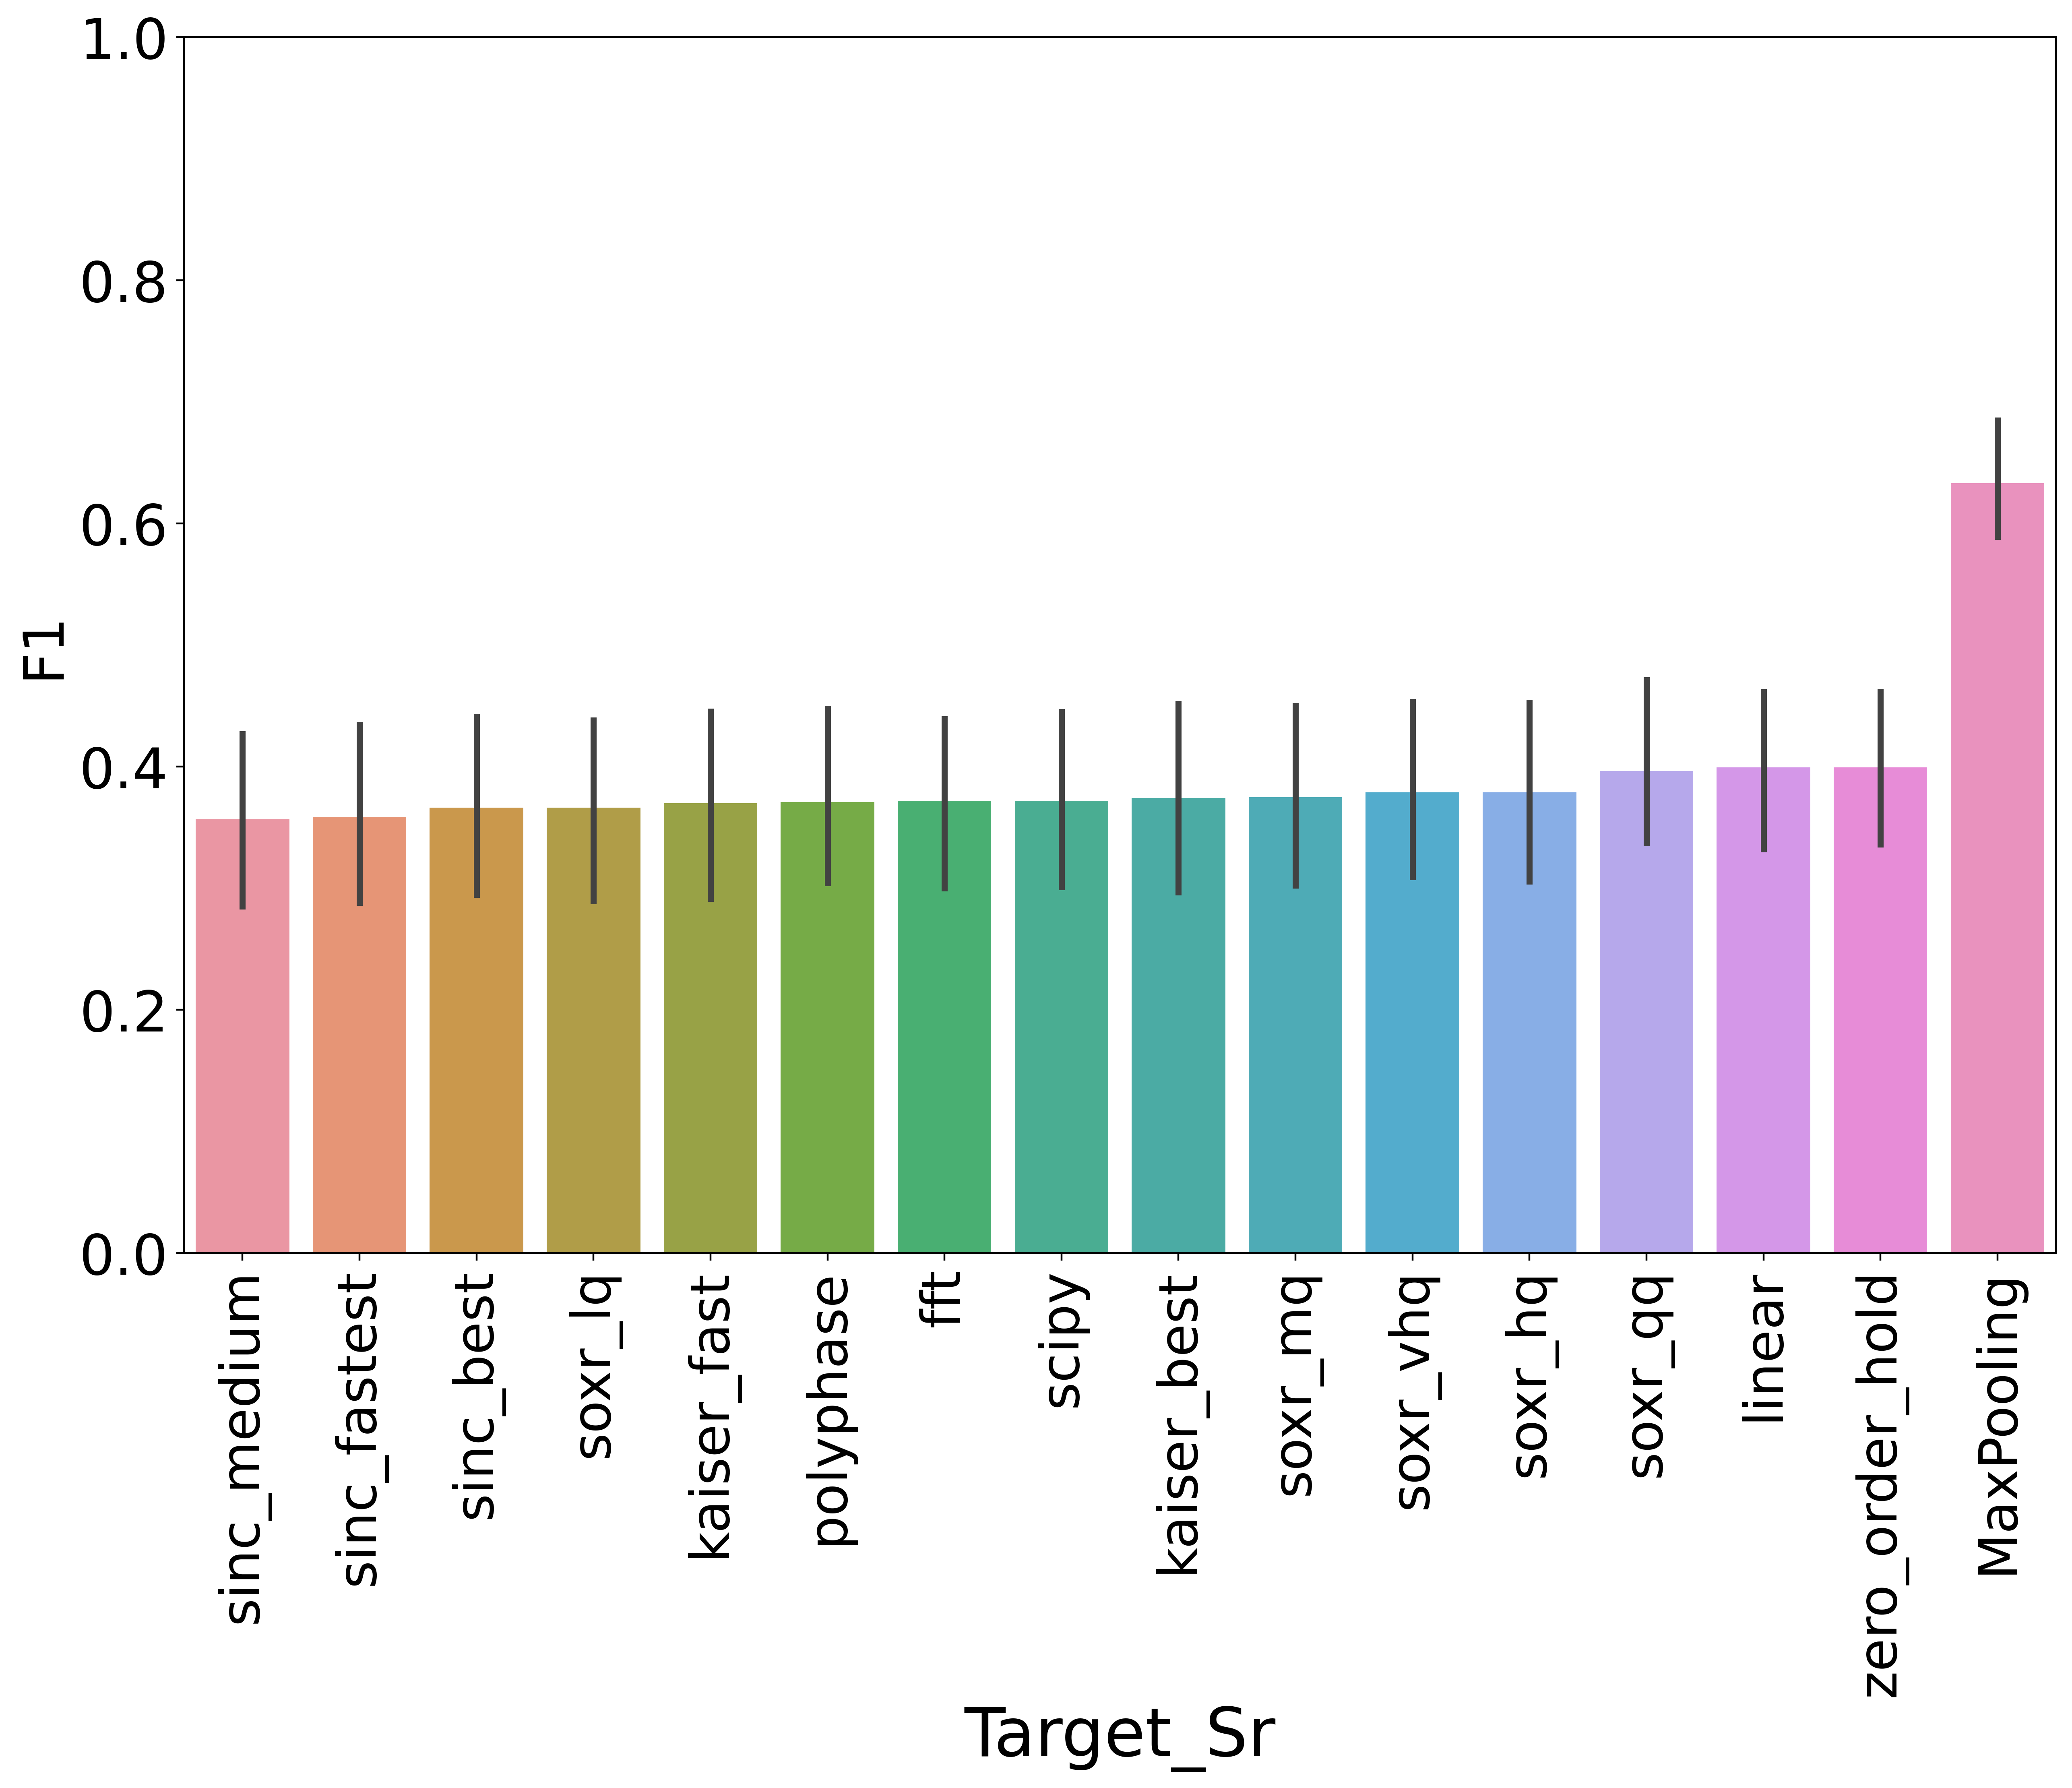

In [85]:
fig = plt.figure(figsize = (15, 10), dpi = 400)
ax1 = sns.barplot(x="sampling_way", y="f1", data=data_df,
                                             order = data_df.groupby('sampling_way').mean().sort_values('f1').index)

ax1.set_ylim(0, 1.0)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize = 24)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 25)
plt.xlabel('Target_Sr', fontsize = 30)
plt.ylabel('F1', fontsize = 25)

# taregt_sr test

In [10]:
result = 0
i = 0
id_lst = ['id_00', 'id_02', 'id_04', 'id_06']

result_lst = []
mean = []

for id_num in id_lst:
    for target_sr in data0['target_sr'].unique():
        mean_data = data0[(data0['Model'] == id_num) & (data0['target_sr'] == target_sr)]['f1'].mean()
        mean.append(round(mean_data, 3))
    result_lst.append(mean)
    mean = []
    
f1_by_sr_df = pd.DataFrame(result_lst).T
f1_by_sr_df = pd.concat([pd.DataFrame(data0['target_sr'].unique()), f1_by_sr_df], axis = 1)
f1_by_sr_df.columns = ['target_sr', 'id_00', 'id_02', 'id_04', 'id_06']

f1_by_sr_df

,target_sr,id_00,id_02,id_04,id_06
0,64,0.709,0.109,0.111,0.256
1,80,0.870,0.123,0.141,0.251
2,100,0.864,0.118,0.467,0.277
3,125,0.787,0.148,0.654,0.328
4,128,0.788,0.149,0.592,0.266
5,160,0.806,0.120,0.487,0.258
6,200,0.815,0.117,0.357,0.257
7,250,0.806,0.083,0.362,0.272
8,320,0.750,0.088,0.261,0.259
9,400,0.700,0.081,0.170,0.262


In [11]:
data0

,Object,Noise,Model,sampling_way,target_sr,acc,recall,precision,f1,auc_score
0,fan,0,id_00,MaxPooling,64,0.820,0.390,0.970,0.557,0.744
1,fan,0,id_00,MaxPooling,80,0.820,0.390,0.970,0.557,0.731
2,fan,0,id_00,MaxPooling,100,0.824,0.390,1.000,0.561,0.766
3,fan,0,id_00,MaxPooling,125,0.810,0.366,0.938,0.526,0.786
4,fan,0,id_00,MaxPooling,128,0.817,0.378,0.969,0.544,0.748
...,...,...,...,...,...,...,...,...,...,...
1339,fan,0,id_06,soxr_qq,3200,0.924,0.708,1.000,0.829,0.986
1340,fan,0,id_06,soxr_qq,4000,0.935,0.750,1.000,0.857,0.981
1341,fan,0,id_06,soxr_qq,8000,0.924,0.708,1.000,0.829,0.984
1342,fan,0,id_06,soxr_qq,10000,0.935,0.750,1.000,0.857,0.990


In [12]:
data_df = data0[['Model', 'target_sr', 'f1']]
data_df.reset_index(drop = True)
data_df

,Model,target_sr,f1
0,id_00,64,0.557
1,id_00,80,0.557
2,id_00,100,0.561
3,id_00,125,0.526
4,id_00,128,0.544
...,...,...,...
1339,id_06,3200,0.829
1340,id_06,4000,0.857
1341,id_06,8000,0.829
1342,id_06,10000,0.857


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
800 v.s. 125: Wilcoxon test (paired samples), P_val=5.352e-02 stat=7.260e+02
Using zero_method  wilcox
128 v.s. 125: Wilcoxon test (paired samples), P_val=4.795e-04 stat=4.045e+02
Using zero_method  wilcox
1000 v.s. 125: Wilcoxon test (paired samples), P_val=6.891e-02 stat=7.680e+02
Using zero_method  wilcox
100 v.s. 125: Wilcoxon test (paired samples), P_val=8.089e-01 stat=9.420e+02
Using zero_method  wilcox
640 v.s. 125: Wilcoxon test (paired samples), P_val=3.702e-03 stat=6.060e+02
Using zero_method  wilcox
160 v.s. 125: Wilcoxon test (paired samples), P_val=4.496e-05 stat=4.120e+02
Using zero_method  wilcox
1600 v.s. 125: Wilcoxon test (paired samples), P_val=5.752e-02 stat=7.560e+02
Using zero_method  wilcox
2000 v.s. 125: Wilcoxon test (paired samples), P_val=6.739e-02 stat=7.665e+02
Using zer

(<Axes: xlabel='target_sr', ylabel='f1'>,
  <statannot.StatResult.StatResult at 0x7f642439b1c0>])

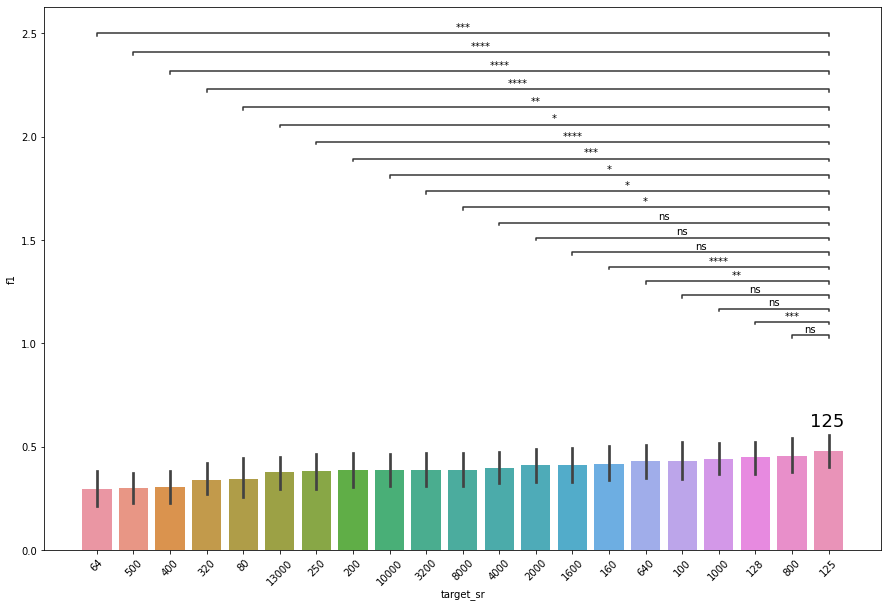

In [13]:
fig = plt.figure(figsize = (15, 10))
ax1 = sns.barplot(x="target_sr", y="f1", data=data_df,
                                             order = data_df.groupby('target_sr').mean().sort_values('f1').index)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
test_result_RF_scaler = add_stat_annotation(ax1, data=data_df, x="target_sr", y="f1",
                                            order=data_df.groupby('target_sr').mean().sort_values('f1').index,
                                            box_pairs=[(f1_by_sr_df.iloc[0,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[1,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[2,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[20,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[4,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[5,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[6,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[7,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[8,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[9,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[10,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[11,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[12,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[13,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[14,0], f1_by_sr_df.iloc[3,0]),  
                                                       (f1_by_sr_df.iloc[15,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[16,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[17,0], f1_by_sr_df.iloc[3,0]),   
                                                       (f1_by_sr_df.iloc[18,0], f1_by_sr_df.iloc[3,0]),
                                                       (f1_by_sr_df.iloc[19,0], f1_by_sr_df.iloc[3,0])],
                                            test= 'Wilcoxon', text_format='star', comparisons_correction=None, 
                                            loc='inside', verbose=2)
ax1.text(19.5 ,0.6, '125', fontsize = 18, color = 'k')
test_result_RF_scaler

/tmp/ipykernel_169876/1803344494.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 25)


Text(0, 0.5, 'F1')

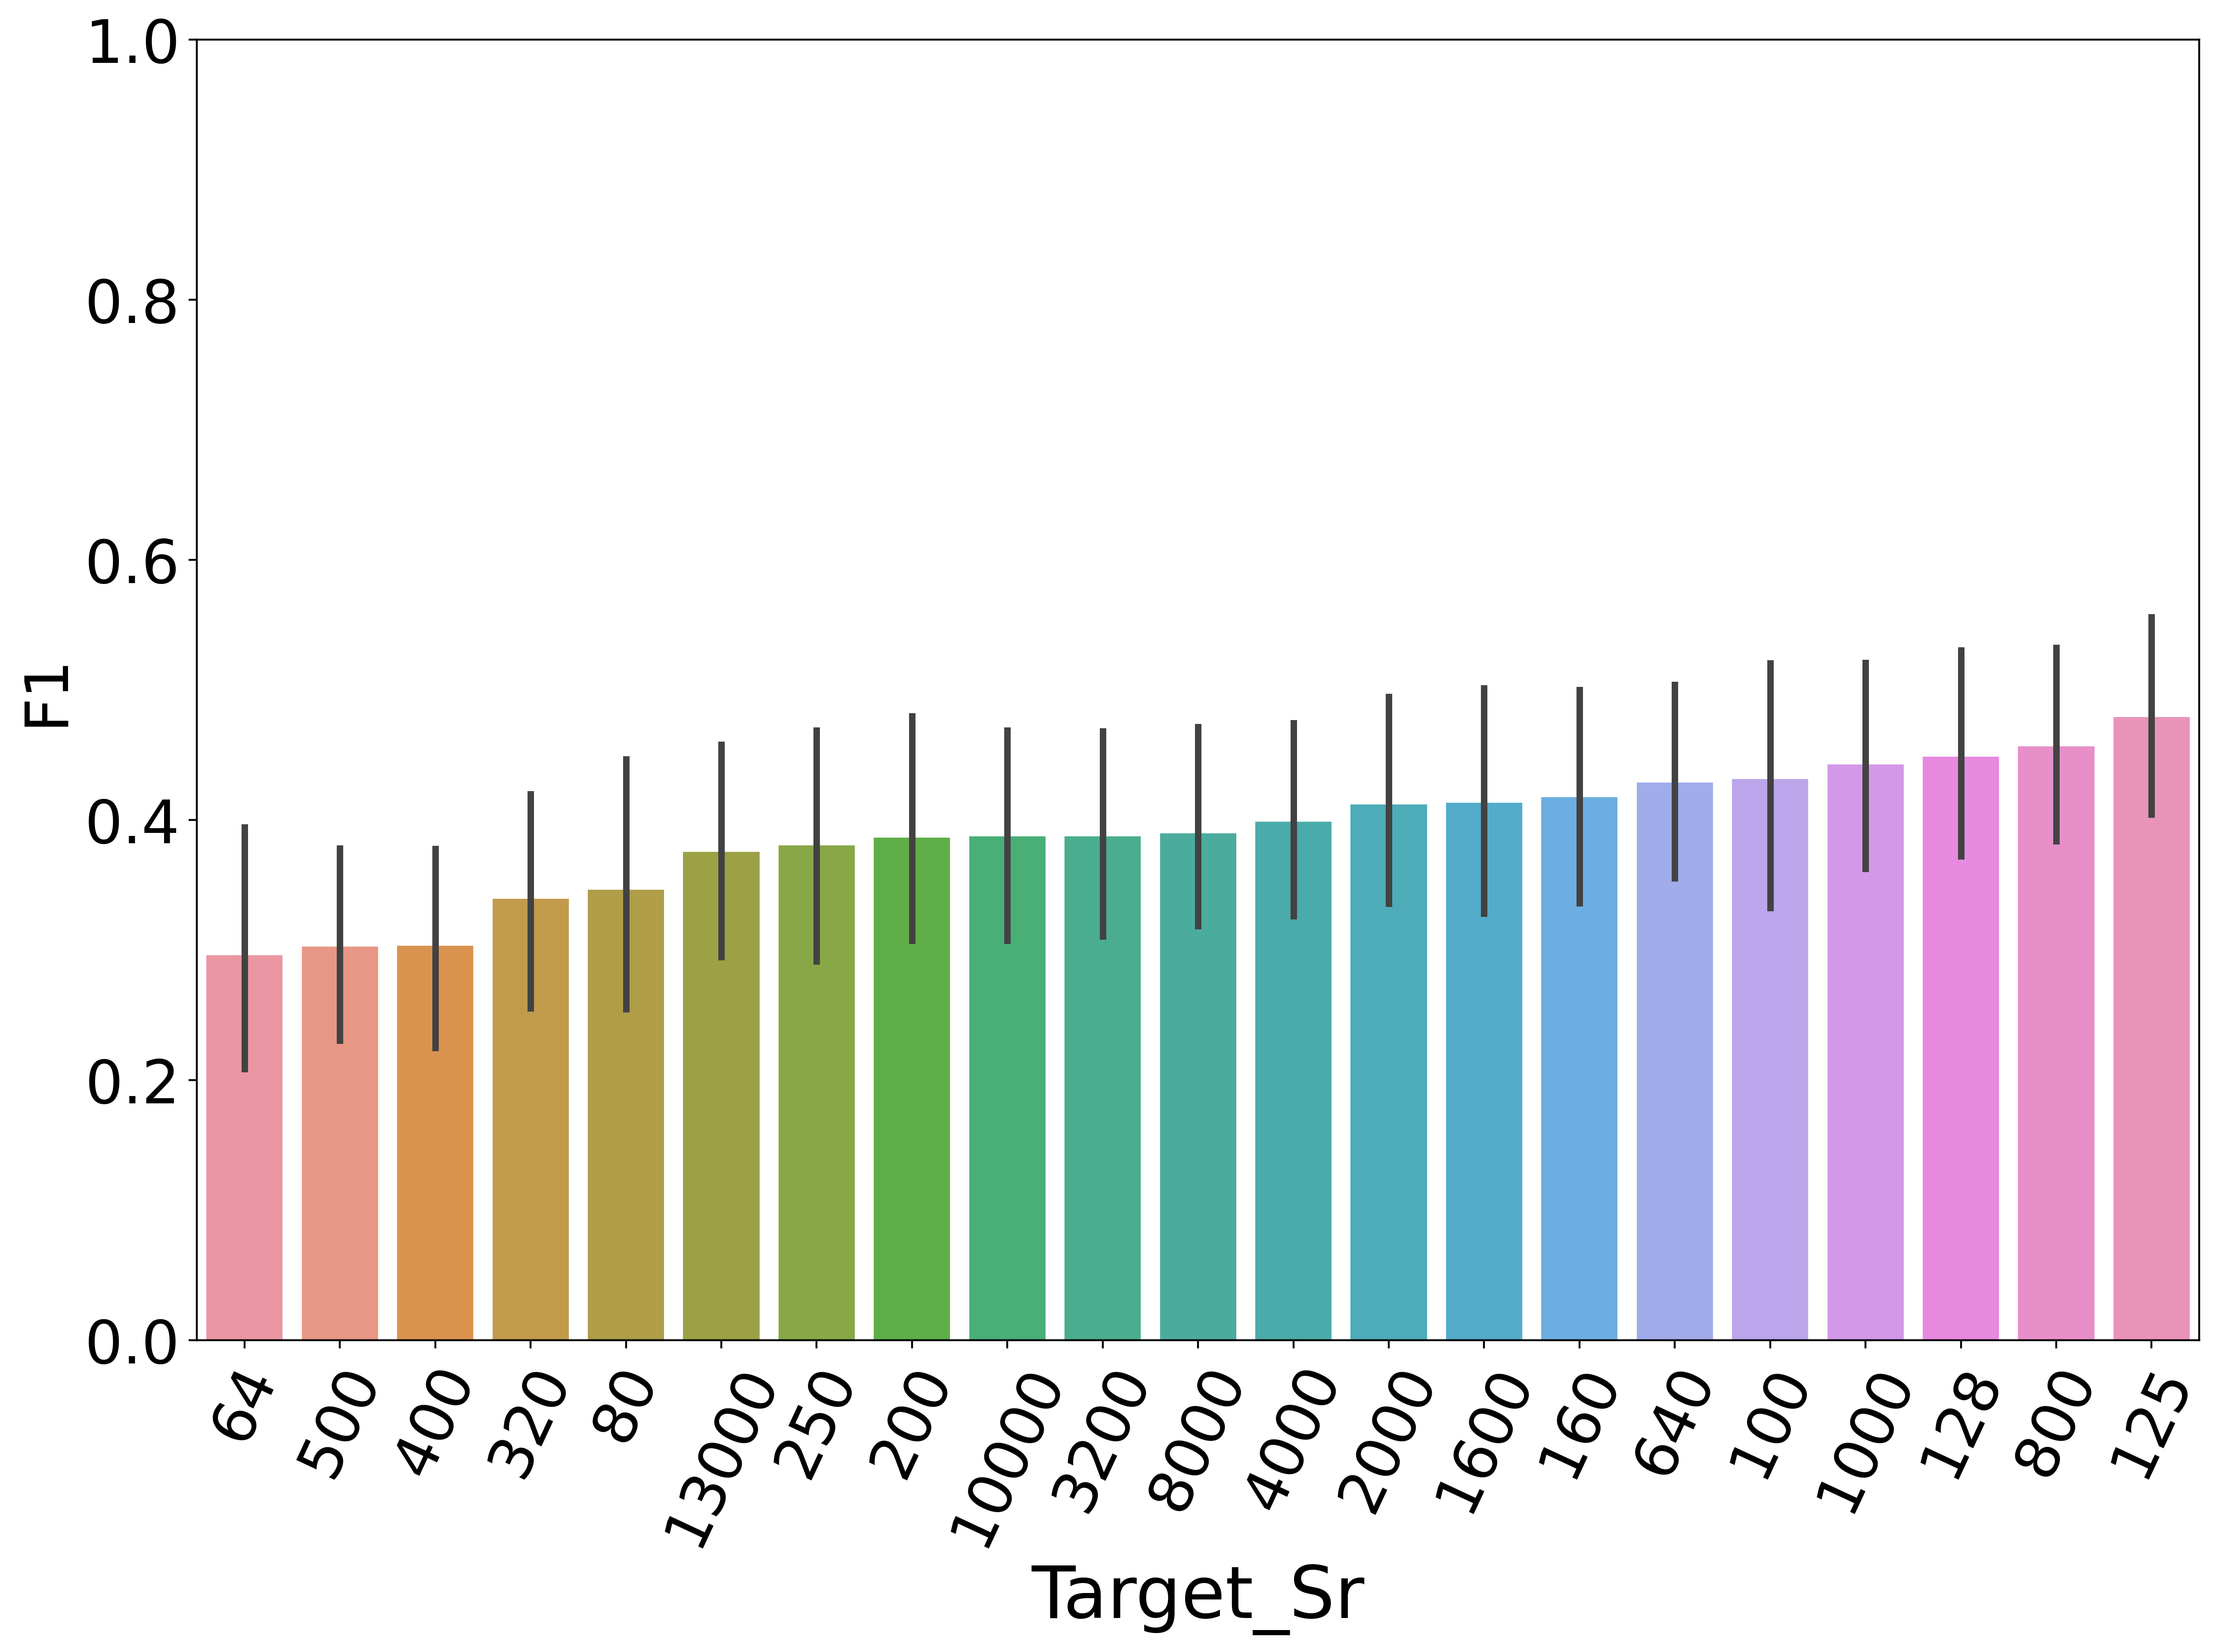

In [14]:
fig = plt.figure(figsize = (15, 10), dpi = 400)
ax1 = sns.barplot(x="target_sr", y="f1", data=data_df,
                                             order = data_df.groupby('target_sr').mean().sort_values('f1').index)


ax1.set_ylim(0, 1.0)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=65, fontsize = 25)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 25)
plt.xlabel('Target_Sr', fontsize = 30)
plt.ylabel('F1', fontsize = 25)